In [181]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [182]:
k_min = 2
k_max = 20

In [183]:
data = pd.read_excel('coffe_or_tea.xlsx')
data.head()

,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,Да,Серо-зеленый,55,Да,Жаворонок,2024-09-21 08:00:00,8.0,Да,Да,Да,Нет,Нет,Правой,Козерог
1,2,Мужчина,Чай,21,85,Нет,Зеленый,70,Да,Жаворонок,2024-09-21 06:00:00,8.0,Да,Нет,Нет,Нет,Нет,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,Да,Голубой,70,Да,Сова,2024-09-21 09:00:00,7.0,Да,Да,Нет,Да,Нет,Правой,Рак
3,4,Мужчина,Кофе,22,80,Да,Карий,60,Да,Сова,2024-09-21 09:00:00,6.0,Да,Да,Нет,Нет,Да,Правой,Скорпион
4,5,Женщина,Кофе,23,50,Нет,Голубой,90,Нет,Сова,2024-09-21 14:00:00,6.0,Нет,Нет,Нет,Да,Да,Левой,Скорпион


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 19 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   Опрашиваемый                                                                   38 non-null     int64         
 1   Укажите Ваш пол                                                                38 non-null     object        
 2   Какой напиток Вы предпочитаете утром?                                          38 non-null     object        
 3   Укажите Ваш возраст                                                            38 non-null     int64         
 4   Насколько здоровый образ жизни Вы ведете? 
Укажите число по шкале от 0 до 100  38 non-null     int64         
 5   Курите ли Вы?                                                                  38 non-n

In [185]:
date_column = ['Во сколько Вы обычно просыпаетесь? Укажите время в формате "Час" и "Минуты"']
for line in date_column:
    data[line] = data[line].dt.strftime('%H')
    data[line] = data[line].astype('int')

data.head()

,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,Да,Серо-зеленый,55,Да,Жаворонок,8,8.0,Да,Да,Да,Нет,Нет,Правой,Козерог
1,2,Мужчина,Чай,21,85,Нет,Зеленый,70,Да,Жаворонок,6,8.0,Да,Нет,Нет,Нет,Нет,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,Да,Голубой,70,Да,Сова,9,7.0,Да,Да,Нет,Да,Нет,Правой,Рак
3,4,Мужчина,Кофе,22,80,Да,Карий,60,Да,Сова,9,6.0,Да,Да,Нет,Нет,Да,Правой,Скорпион
4,5,Женщина,Кофе,23,50,Нет,Голубой,90,Нет,Сова,14,6.0,Нет,Нет,Нет,Да,Да,Левой,Скорпион


In [186]:
column_list = data.columns.tolist()

for column in column_list:
    unique_values = data[column].unique()
    if len(unique_values) == 2:
        data[column] = data[column].replace('Да', True)
        data[column] = data[column].replace('Нет', False)

data.head()

/tmp/ipykernel_3707/3903154473.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace('Нет', False)


,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,True,Серо-зеленый,55,True,Жаворонок,8,8.0,True,True,True,False,False,Правой,Козерог
1,2,Мужчина,Чай,21,85,False,Зеленый,70,True,Жаворонок,6,8.0,True,False,False,False,False,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,True,Голубой,70,True,Сова,9,7.0,True,True,False,True,False,Правой,Рак
3,4,Мужчина,Кофе,22,80,True,Карий,60,True,Сова,9,6.0,True,True,False,False,True,Правой,Скорпион
4,5,Женщина,Кофе,23,50,False,Голубой,90,False,Сова,14,6.0,False,False,False,True,True,Левой,Скорпион


In [187]:
columns_to_drop = ['Опрашиваемый', 'Какой рукой Вы пишите?', 'Какой у Вас знак зодиака?']
data_cleaned = data.drop(columns=columns_to_drop)

In [188]:
label_encoder = LabelEncoder()
data_cleaned['Какой напиток Вы предпочитаете утром?'] = label_encoder.fit_transform(
    data_cleaned['Какой напиток Вы предпочитаете утром?'])

In [189]:
data_cleaned = pd.get_dummies(data_cleaned)
data_cleaned.head()

,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,...,Укажите цвет Вашего левого глаза_Карий,Укажите цвет Вашего левого глаза_Коричневый,Укажите цвет Вашего левого глаза_Серо-голубой,Укажите цвет Вашего левого глаза_Серо-зеленый,Укажите цвет Вашего левого глаза_Серый,Укажите цвет Вашего левого глаза_Синий,"Укажите цвет Вашего левого глаза_Такой же, как и правого",Укажите цвет Вашего левого глаза_карий,Укажите Ваш хронотип_Жаворонок,Укажите Ваш хронотип_Сова
0,0,22,65,True,55,True,8,8.0,True,True,...,False,False,False,True,False,False,False,False,True,False
1,1,21,85,False,70,True,6,8.0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0,22,50,True,70,True,9,7.0,True,True,...,False,False,False,False,False,False,False,False,False,True
3,0,22,80,True,60,True,9,6.0,True,True,...,True,False,False,False,False,False,False,False,False,True
4,0,23,50,False,90,False,14,6.0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [190]:
X = data_cleaned.drop(columns=['Какой напиток Вы предпочитаете утром?'])
y = data_cleaned['Какой напиток Вы предпочитаете утром?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [149]:
accuracy_scores = []

for k in range(k_min, k_max + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy_scores.append(model.score(X_test, y_test))

print(accuracy_scores)

[0.5, 0.5625, 0.3125, 0.625, 0.5, 0.625, 0.6875, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625]


In [191]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(k_min, k_max + 1)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # cv=10 для 10-кратной кросс-валидации
grid_search.fit(X, y)

# Лучшая модель и её параметры
best_k = grid_search.best_params_['n_neighbors']
print(f'Наилучшее значение k: {best_k}')

Наилучшее значение k: 7


In [194]:
accuracy_scores = []
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_scores.append(model.score(X_test, y_test))

print(accuracy_scores)

[0.625]


ValueError: x and y must have same first dimension, but have shapes (19,) and (22,)

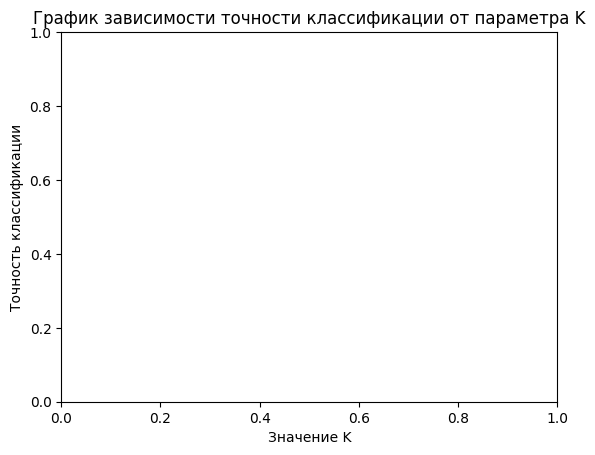

In [169]:
plt.title('График зависимости точности классификации от параметра K')

plt.xlabel('Значение K')
plt.ylabel('Точность классификации')

plt.plot(range(k_min, k_max + 1), accuracy_scores)
plt.xticks(range(k_min, k_max + 1))
plt.grid(True)

plt.show()